In [1]:
# 12/06

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
import pylab

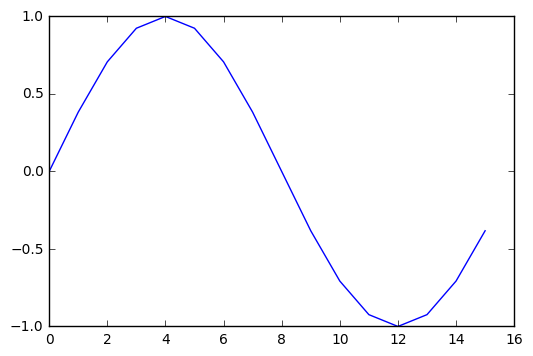

In [6]:
N = 16
plt.plot([math.sin(2*math.pi * 1/N * i) for i in range(N)])

In [19]:
N = 128
fN = 1
phase_shift = math.pi/3
x = np.array([cmath.exp(1j* (2*math.pi * fN/N * i + phase_shift)) for i in range(N)])

# e^iwt = cos(wt) + i*sin(wt)
# e^i(wt+phi) = cos(wt+phi) + i*sin(wt+phi)

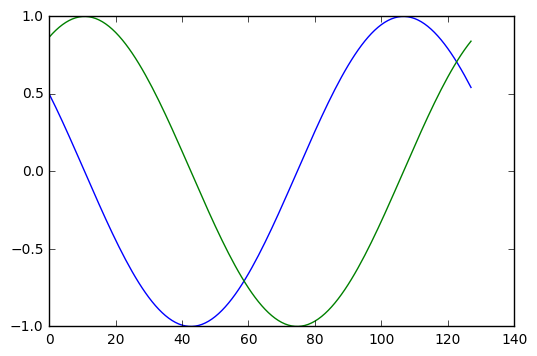

In [20]:
plt.plot(x.real)
plt.plot(x.imag)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


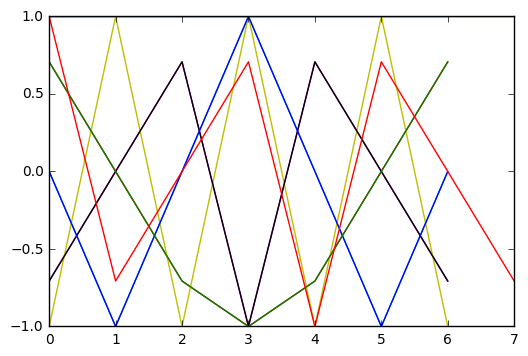

In [24]:
N=8
DFTbasis = np.array([[cmath.exp(1j* (2*math.pi / N *m *n)) for n in range(N)] for m in range(N)] )
                      
plt.plot(DFTbasis[0, :].real)
plt.plot(DFTbasis[1. :].real)
plt.plot(DFTbasis[5, :].real)

In [33]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    
    for m in range(N):
        for n in range(N):
            X[m] += cmath.exp(-1j * 2*math.pi / N *m *n) *x[n]
            
    return X/N

# inverse
def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    
    for n in range(N):
        for m in range(N):
            x[n] += cmath.exp(1j * 2*math.pi / N *m *n) * X[m]
            
    return x


def fft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    if N == 1:
        X[0] = x[0]
        return X
    
    N2 = N//2
    xeven = x[0::2]
    xodd = x[1::2]
    Xeven = fft(xeven) *N2
    Xodd = fft(xodd) *N2
    
    for m in range(N):
        X[m] = Xeven[m%N2] + cmath.exp(-1j *2*math.pi/N*m) *Xodd[m%N2]
        
    return X / N

def ifft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    if N == 1:
        x[0] = X[0]
        return x
    
    N2 = N//2
    Xeven = X[0::2]
    Xodd = X[1::2]
    xeven = fft(Xeven)
    xodd = fft(Xodd)
    
    for n in range(N):
        x[n] = xeven[n%N2] + cmath.exp(1j *2*math.pi/N*n) *xodd[n%N2]
        
    return x
    

In [34]:
N = 16
fN = 3
phase_shift = math.pi/4
x = np.array([cmath.exp(1j* (2*math.pi * fN/N * i + phase_shift)) for i in range(N)])

fN = 1
phase_shift = math.pi/3
y = np.array([cmath.exp(1j* (2*math.pi * fN/N * i + phase_shift)) for i in range(N)])

#plt.plot(x.real)
X = dft(x.real)

In [35]:
X.real

array([  1.52655666e-16,  -4.16333634e-17,  -6.24500451e-17,
         3.53553391e-01,  -1.05474808e-16,  -2.49800181e-16,
        -1.66533454e-16,   2.42861287e-16,   1.80411242e-16,
         2.01227923e-16,  -1.80411242e-16,   5.89805982e-17,
         6.15408320e-17,   3.53553391e-01,  -5.41233725e-16,
        -4.51028104e-16])

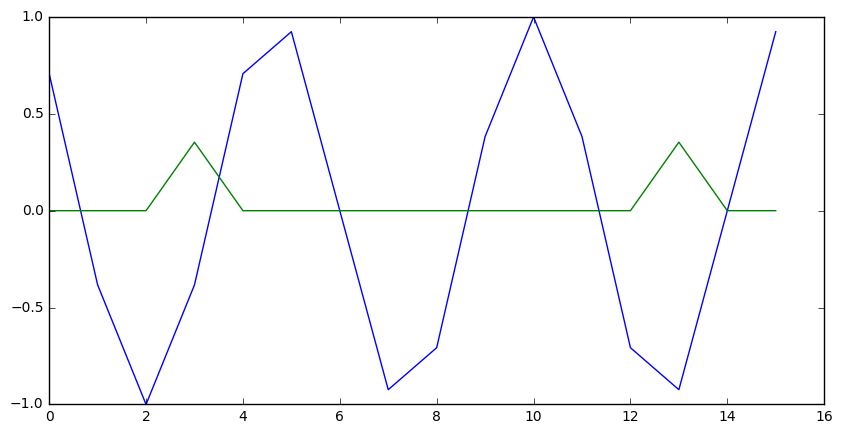

In [36]:
plt.plot(x.real)
plt.plot(X.real)

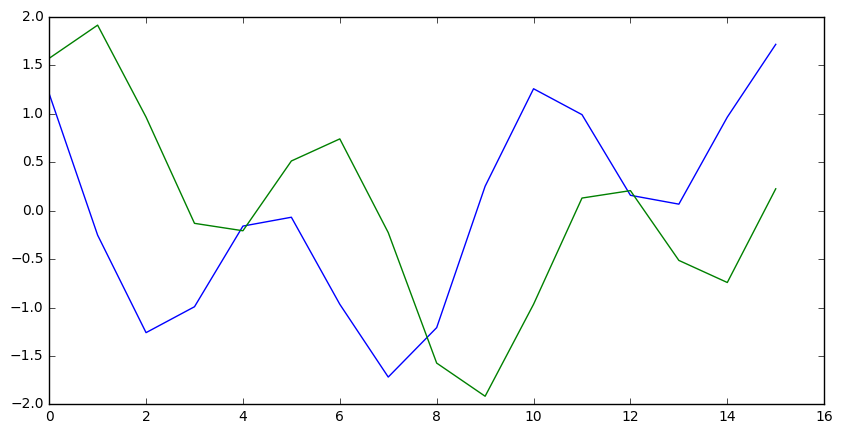

In [37]:
plt.plot(x.real+y.real)
plt.plot(x.imag+y.imag)

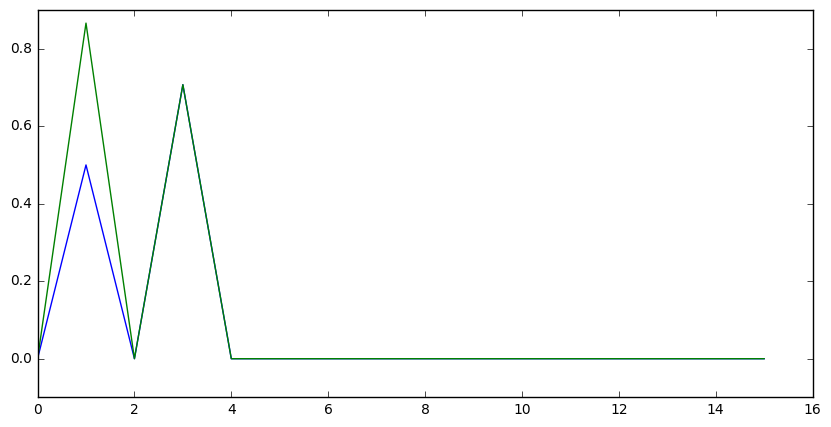

In [38]:
XY = dft(x+y)
plt.plot(XY.real)
plt.plot(XY.imag)

In [39]:
xyreal = x.real + y.real
#XY = dft(xyreal)
#xyreconstruct = idft(XY)

#1213
XY = fft(xyreal)
xyreconstruct = ifft(XY)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


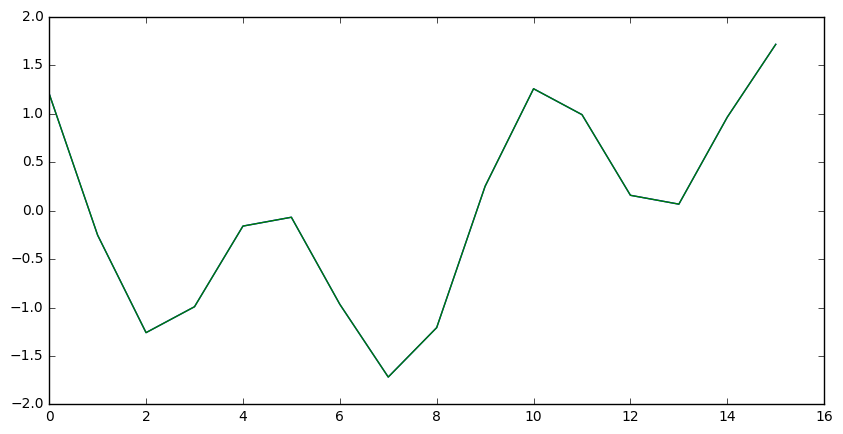

In [32]:
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(xyreal)
plt.plot(xyreconstruct)


#shape一樣 差N倍
#現在沒差了

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


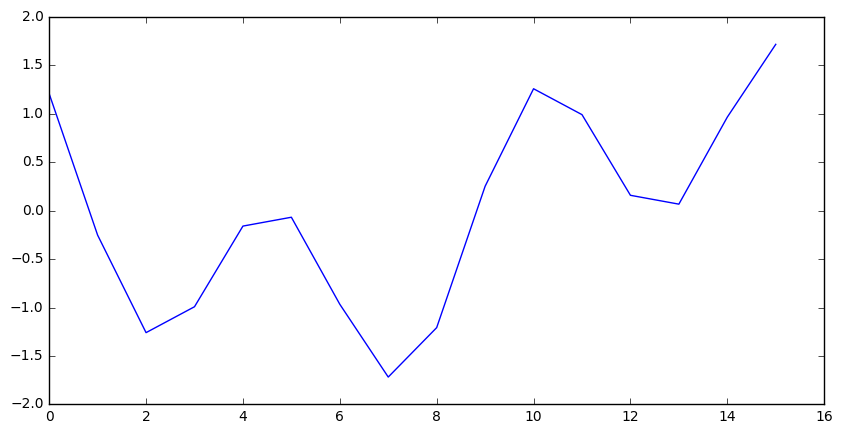

In [19]:
plt.plot(xyreconstruct)

#shape一樣 差N倍
#現在沒差了

In [3]:
# 12/13

N=32
fN = 1
phase_shift = math.pi/3
y = np.array([cmath.exp(1j* (2*math.pi * fN/N * i + phase_shift)) for i in range(N)])

DFTbasis = np.array([[cmath.exp(1j * (2*math.pi/N*m*n)) for n in range(N)] for m in range(N)])

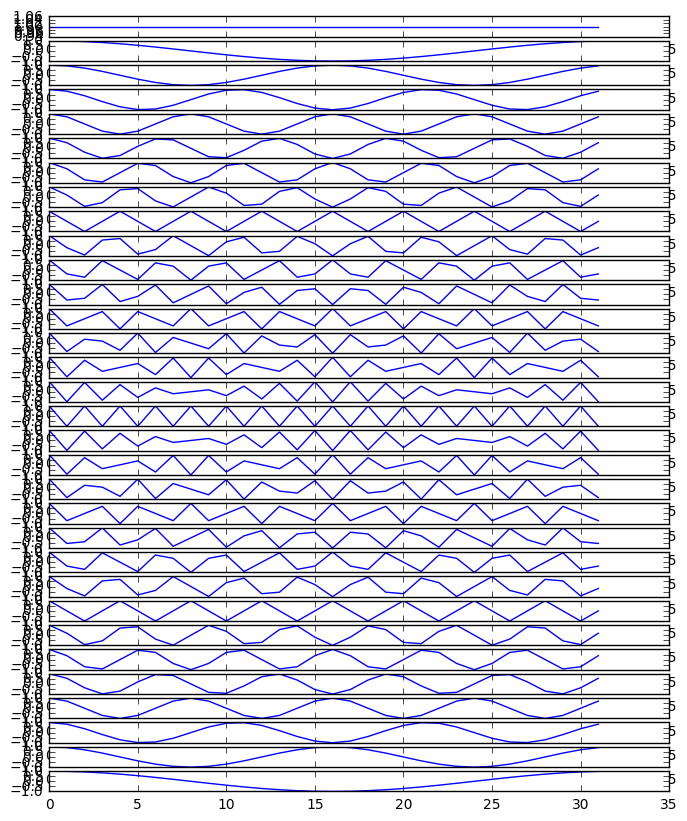

In [6]:
plt.rcParams['figure.figsize'] = [8,10]

N=32
for i in range(N):
    plt.subplot(N, 1, i+1)
    plt.plot(DFTbasis[i].real)  #imag也可以